In [139]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [140]:
# Load data

df = pd.read_csv('alzheimers_disease_data_cleaned.csv')

In [141]:
# Display the first 5 rows of the dataset

df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,66-75,Male,Caucasian,Bachelor's,21-25,No,11-15,7-8,0-2,...,No,No,0-2,No,No,No,Yes,No,No,XXXConfid
1,4752,86-95,Male,Caucasian,No Education,26-30,No,0-5,7-8,0-2,...,No,No,3-4,No,No,No,No,Yes,No,XXXConfid
2,4753,66-75,Male,Other,High School,15-20,No,16-20,7-8,0-2,...,No,No,7-8,No,Yes,No,Yes,No,No,XXXConfid
3,4754,66-75,Female,Caucasian,High School,31-35,Yes,11-15,9-10,7-8,...,No,Yes,7-8,No,No,No,No,No,No,XXXConfid
4,4755,86-95,Male,Caucasian,No Education,21-25,No,16-20,7-8,0-2,...,No,No,0-2,No,No,Yes,Yes,No,No,XXXConfid
5,4756,86-95,Female,African American,High School,31-35,No,0-5,0-2,0-2,...,No,No,9-10,Yes,No,No,No,No,No,XXXConfid
6,4757,66-75,Male,Other,Bachelor's,36-40,Yes,0-5,9-10,5-6,...,No,No,9-10,No,No,No,No,Yes,No,XXXConfid
7,4758,66-75,Male,Caucasian,High School,15-20,No,11-15,5-6,9-10,...,No,No,5-6,Yes,No,No,No,Yes,Yes,XXXConfid
8,4759,66-75,Female,African American,No Education,26-30,No,11-15,0-2,7-8,...,No,Yes,0-2,No,No,Yes,No,No,No,XXXConfid
9,4760,86-95,Male,Caucasian,No Education,36-40,Yes,16-20,7-8,9-10,...,No,Yes,5-6,No,No,No,No,No,No,XXXConfid


In [142]:
# Display the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PatientID                  2149 non-null   int64 
 1   Age                        2149 non-null   object
 2   Gender                     2149 non-null   object
 3   Ethnicity                  2149 non-null   object
 4   EducationLevel             2149 non-null   object
 5   BMI                        2149 non-null   object
 6   Smoking                    2149 non-null   object
 7   AlcoholConsumption         2149 non-null   object
 8   PhysicalActivity           2149 non-null   object
 9   DietQuality                2149 non-null   object
 10  SleepQuality               2149 non-null   object
 11  FamilyHistoryAlzheimers    2149 non-null   object
 12  CardiovascularDisease      2149 non-null   object
 13  Diabetes                   2149 non-null   object
 14  Depressi

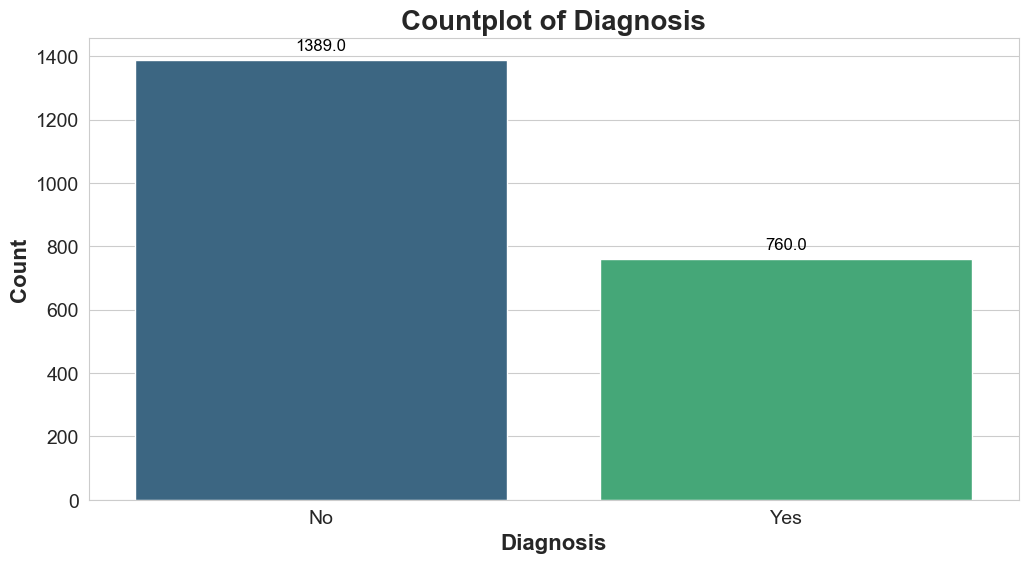

In [143]:
# 1. Countplot for Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='Diagnosis', data=df, palette='viridis')

# Agregar título y etiquetas
ax.set_title('Countplot of Diagnosis', fontsize=20, fontweight='bold')
ax.set_xlabel('Diagnosis', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')

# Agregar etiquetas de barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Mostrar el gráfico
plt.show()

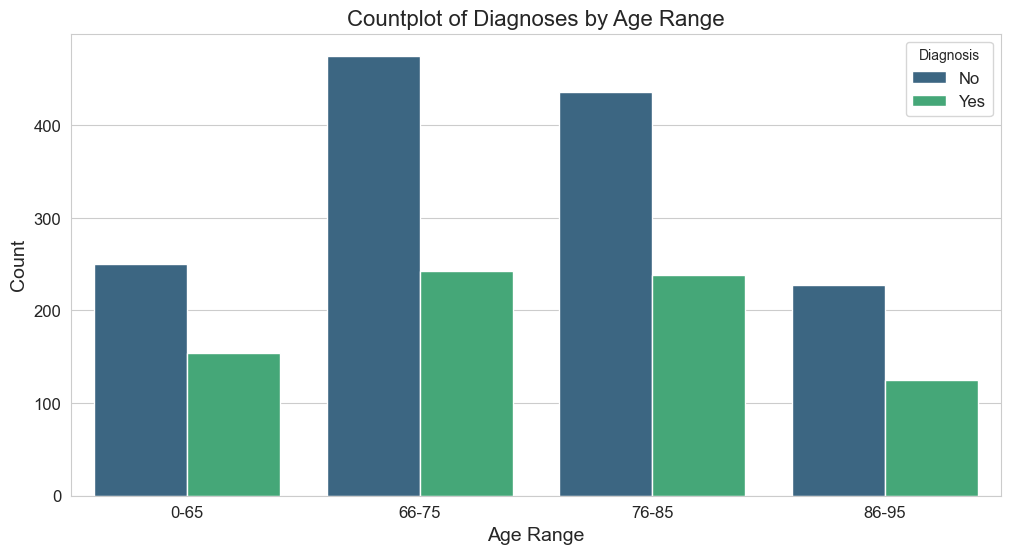

In [144]:
# 2. Countplot of Diagnoses by Age Range

# Ordenar los rangos de edad
age_order = ['0-65', '66-75', '76-85', '86-95']

# Convertir la columna 'Age' a tipo categoría con el orden especificado
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='Age', hue='Diagnosis', data=df, palette='viridis')
ax.set_title('Countplot of Diagnoses by Age Range', fontsize=16)
ax.set_xlabel('Age Range', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Diagnosis', fontsize=12)
plt.show()

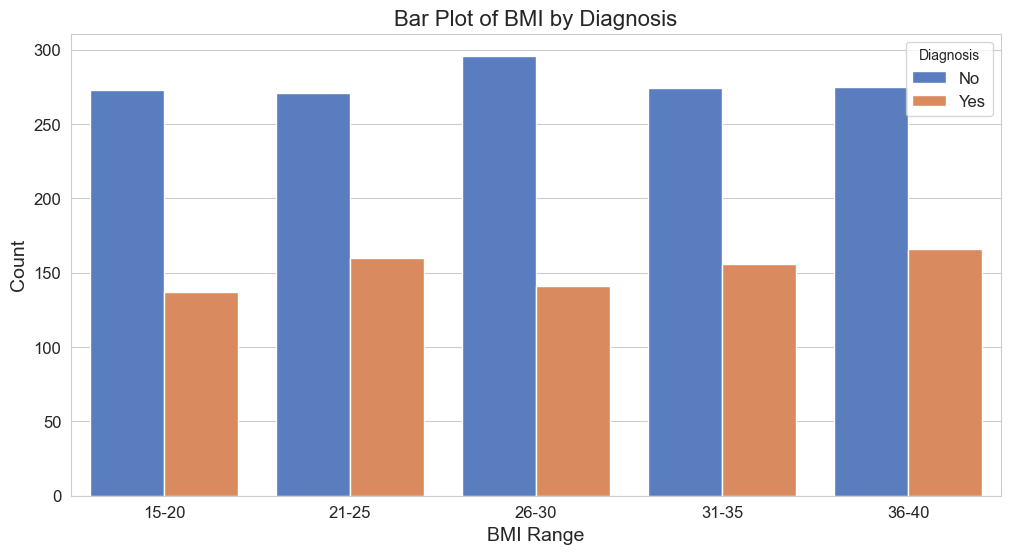

In [145]:
# Definir el orden de los rangos de BMI
bmi_order = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Convertir la columna 'BMI' a tipo categoría con el orden especificado
df['BMI'] = pd.Categorical(df['BMI'], categories=bmi_order, ordered=True)

# 3. Bar plot of BMI by Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='BMI', hue='Diagnosis', data=df, palette='muted')
ax.set_title('Bar Plot of BMI by Diagnosis', fontsize=16)
ax.set_xlabel('BMI Range', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Diagnosis', fontsize=12)
plt.show()

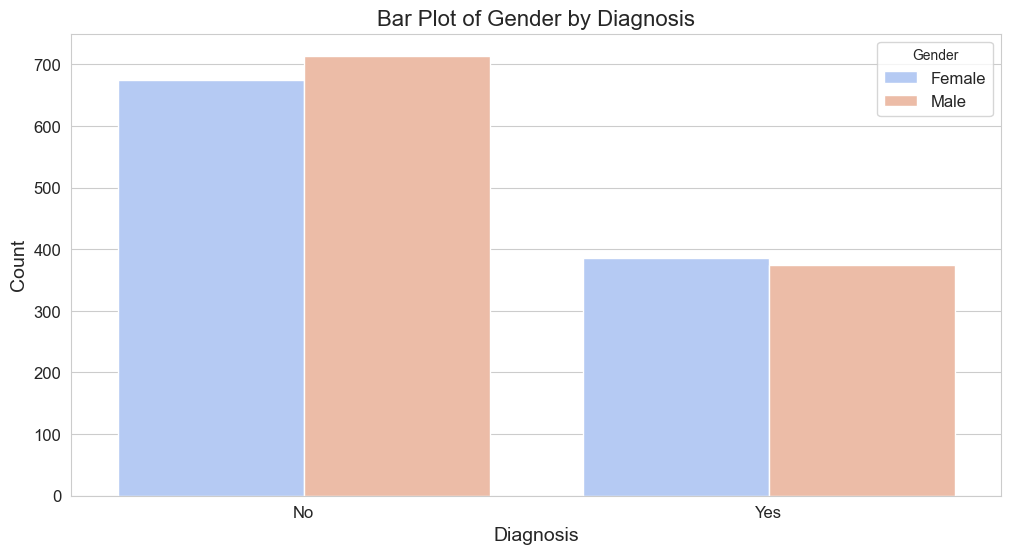

In [146]:
# 4. Bar plot of Gender by Diagnosis
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Diagnosis', hue='Gender', data=df, palette='coolwarm')
ax.set_title('Bar Plot of Gender by Diagnosis', fontsize=16)
ax.set_xlabel('Diagnosis', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.legend(title='Gender', labels=['Female', 'Male'], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

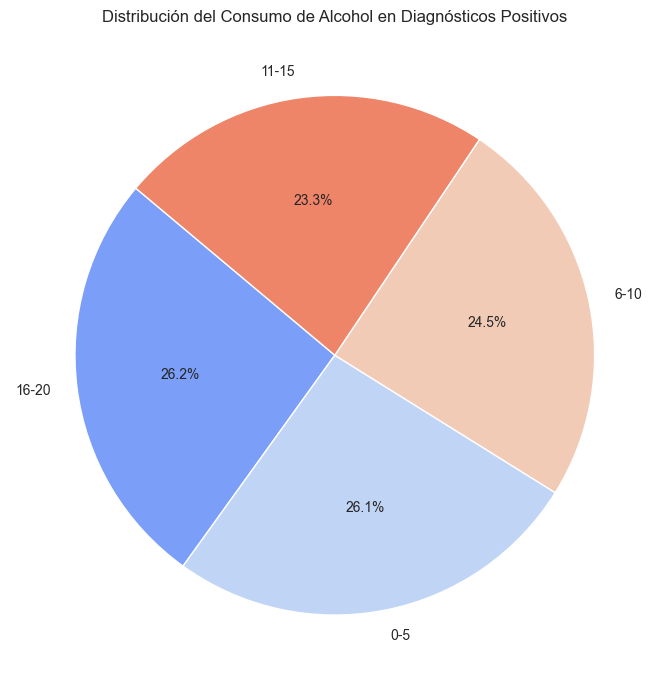

In [147]:

# Pie chart para el diagnóstico positivo con el consumo de alcohol
plt.figure(figsize=(14, 7))

# Filtrar los datos para diagnósticos positivos
df_positive = df[df['Diagnosis'] == 'Yes']

# Pie chart para el consumo de alcohol en diagnósticos positivos
alcohol_counts_positive = df_positive['AlcoholConsumption'].value_counts()
plt.pie(alcohol_counts_positive, labels=alcohol_counts_positive.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(alcohol_counts_positive)))
plt.title('Distribución del Consumo de Alcohol en Diagnósticos Positivos')

plt.tight_layout()
plt.show()


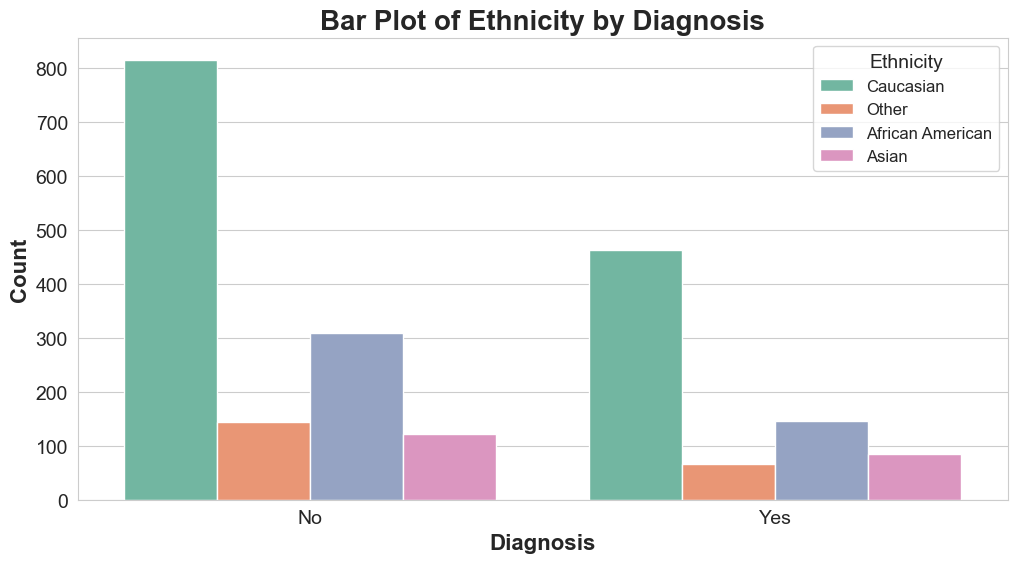

In [148]:
# Bar plot of Ethnicity by Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(data=df, x='Diagnosis', hue='Ethnicity', palette='Set2')

# Add title and labels
ax.set_title('Bar Plot of Ethnicity by Diagnosis', fontsize=20, fontweight='bold')
ax.set_xlabel('Diagnosis', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')

# Adjust legend
plt.legend(title='Ethnicity', fontsize=12, title_fontsize=14)

# Adjust tick parameters
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.show()

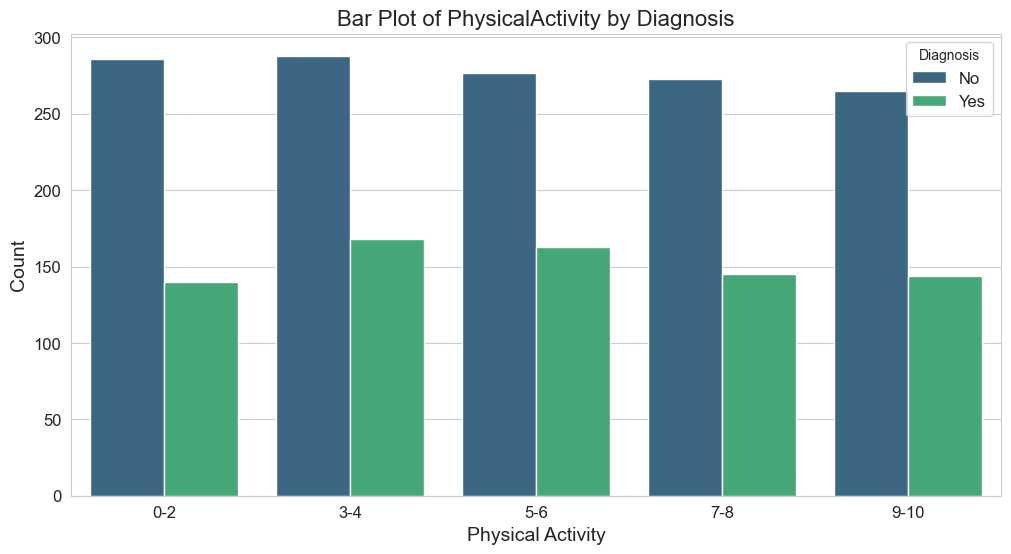

In [149]:
# 6. Bar plot of PhysicalActivity by Diagnosis

# Definir el orden de los rangos de PhysicalActivity
physical_activity_order = ['0-2', '3-4', '5-6', '7-8', '9-10']

# Convertir la columna 'PhysicalActivity' a tipo categoría con el orden especificado
df['PhysicalActivity'] = pd.Categorical(df['PhysicalActivity'], categories=physical_activity_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='PhysicalActivity', hue='Diagnosis', data=df, palette='viridis')
ax.set_title('Bar Plot of PhysicalActivity by Diagnosis', fontsize=16)
ax.set_xlabel('Physical Activity', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Diagnosis', fontsize=12)
plt.show()

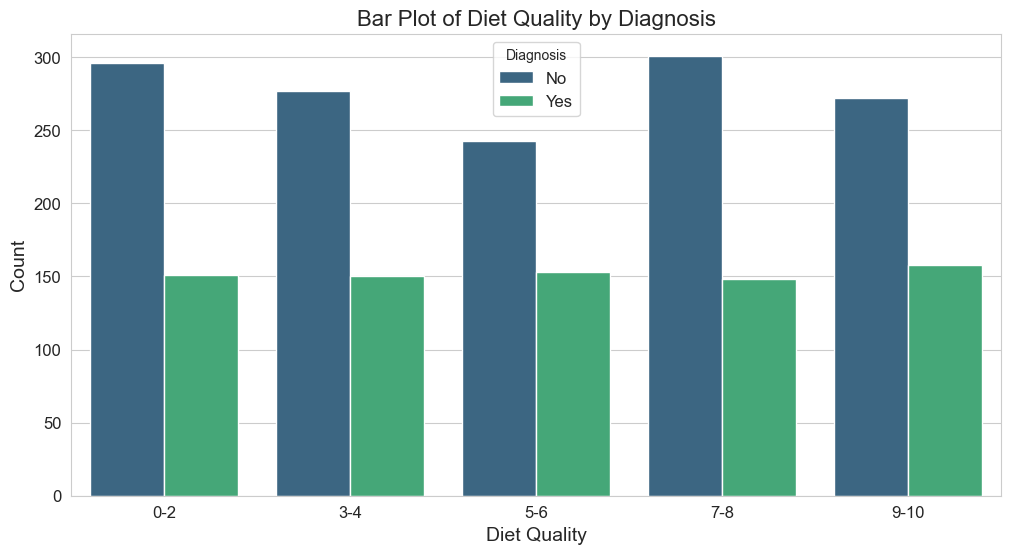

In [150]:
# 8. Bar plot of Diet Quality by Diagnosis

# Definir el orden de los rangos de DietQuality
diet_quality_order = ['0-2', '3-4', '5-6', '7-8', '9-10']

# Convertir la columna 'DietQuality' a tipo categoría con el orden especificado
df['DietQuality'] = pd.Categorical(df['DietQuality'], categories=diet_quality_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='DietQuality', hue='Diagnosis', data=df, palette='viridis')
ax.set_title('Bar Plot of Diet Quality by Diagnosis', fontsize=16)
ax.set_xlabel('Diet Quality', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Diagnosis', fontsize=12)
plt.show()

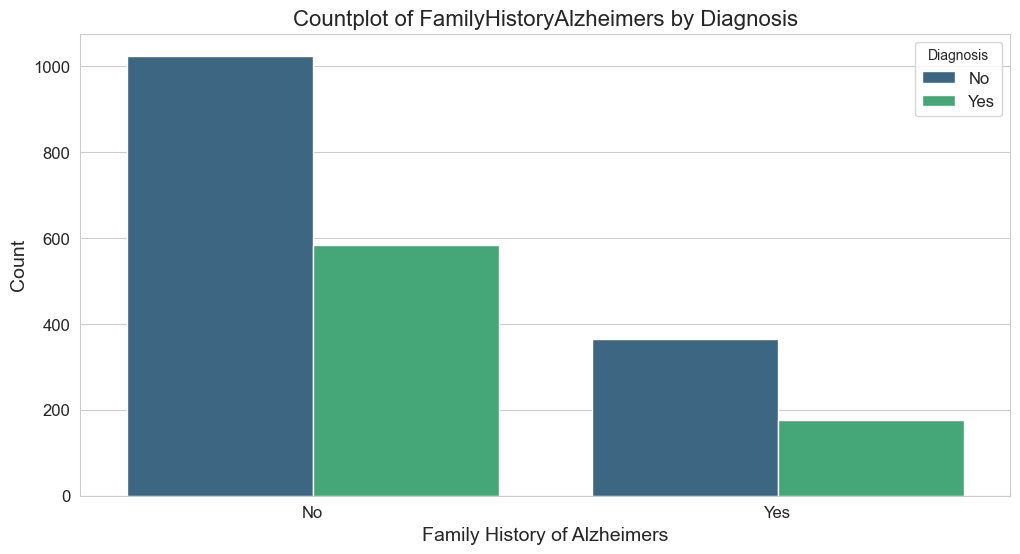

In [151]:
# 9. Countplot of FamilyHistoryAlzheimers by Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=df, palette='viridis')
ax.set_title('Countplot of FamilyHistoryAlzheimers by Diagnosis', fontsize=16)
ax.set_xlabel('Family History of Alzheimers', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Diagnosis', fontsize=12)
plt.show()

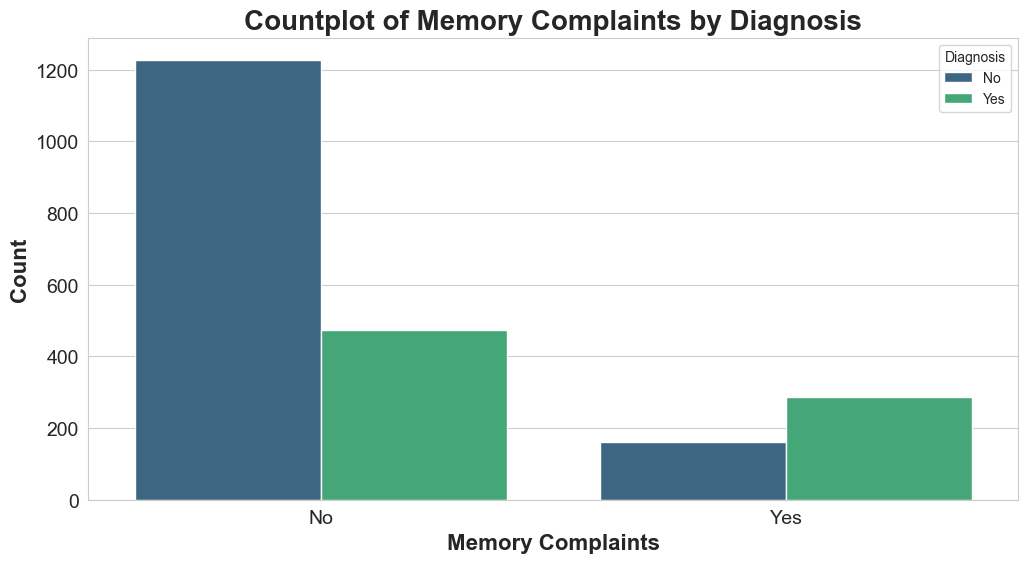

In [161]:
# Bar plot of MemoryComplaints by Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='MemoryComplaints', hue='Diagnosis', data=df, palette='viridis')

# Agregar título y etiquetas
ax.set_title('Countplot of Memory Complaints by Diagnosis', fontsize=20, fontweight='bold')
ax.set_xlabel('Memory Complaints', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Mostrar el gráfico
plt.show()

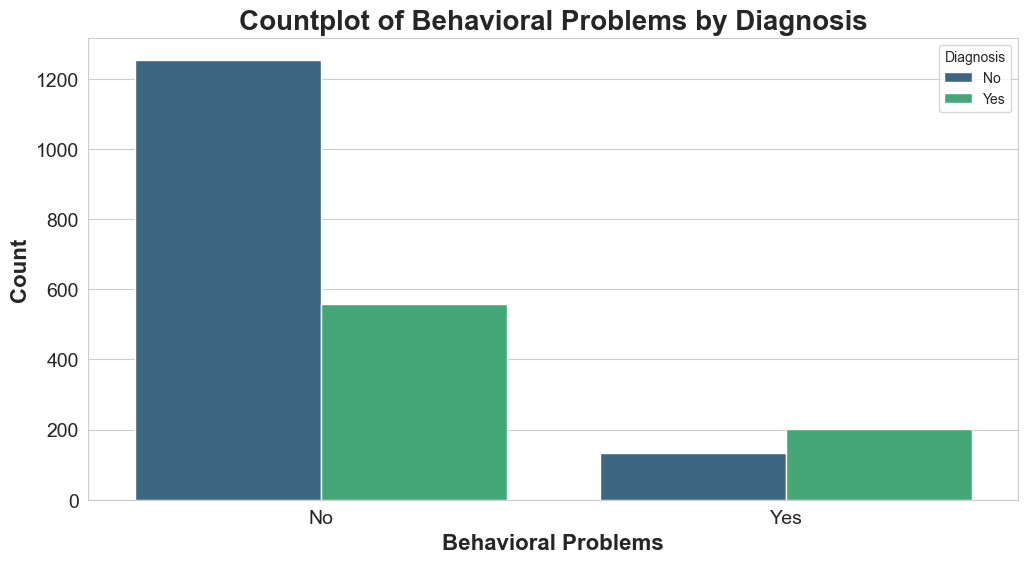

In [162]:
# Countplot of BehavioralProblems by Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.countplot(x='BehavioralProblems', hue='Diagnosis', data=df, palette='viridis')

# Agregar título y etiquetas
ax.set_title('Countplot of Behavioral Problems by Diagnosis', fontsize=20, fontweight='bold')
ax.set_xlabel('Behavioral Problems', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Mostrar el gráfico
plt.show()

In [154]:
# Load data

df_2 = pd.read_csv('alzheimers_disease_data.csv')

# Display the first 5 rows of the dataset

df_2.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,...,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,...,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,...,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,...,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,...,0,1,4.554394,0,0,0,0,0,0,XXXConfid


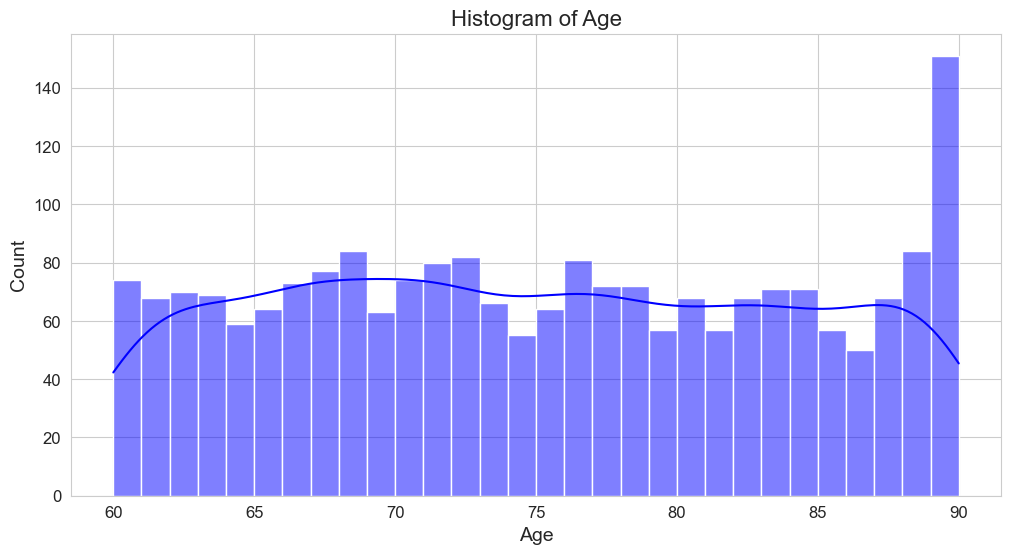

In [155]:
# Histogram of Age
plt.figure(figsize=(12, 6))
sns.histplot(df_2['Age'], bins=30, color='blue', kde=True)
plt.title('Histogram of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

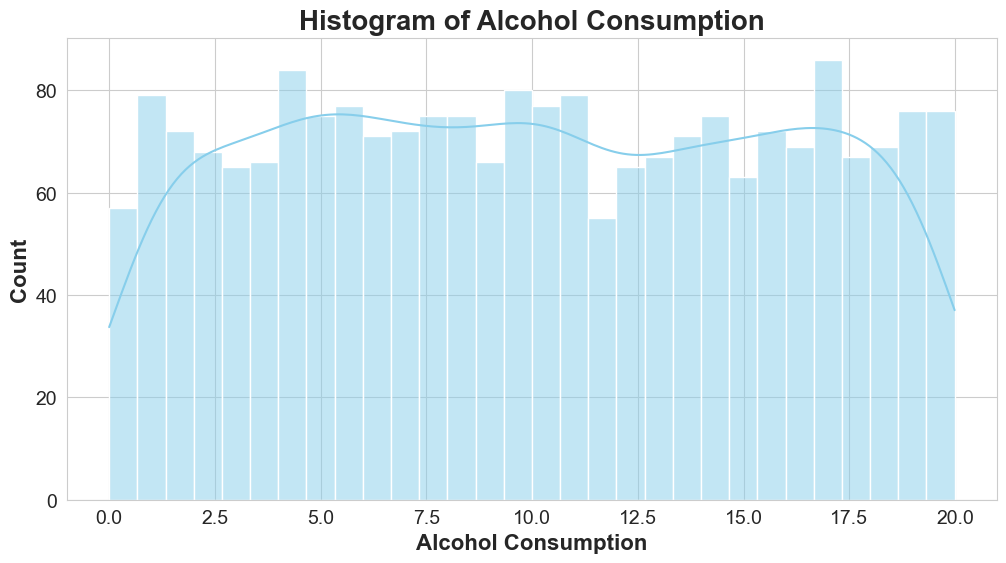

In [163]:
# 3. Histogram of AlcoholConsumption
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.histplot(df_2['AlcoholConsumption'], bins=30, kde=True, color='skyblue')
ax.set_title('Histogram of Alcohol Consumption', fontsize=20, fontweight='bold')
ax.set_xlabel('Alcohol Consumption', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

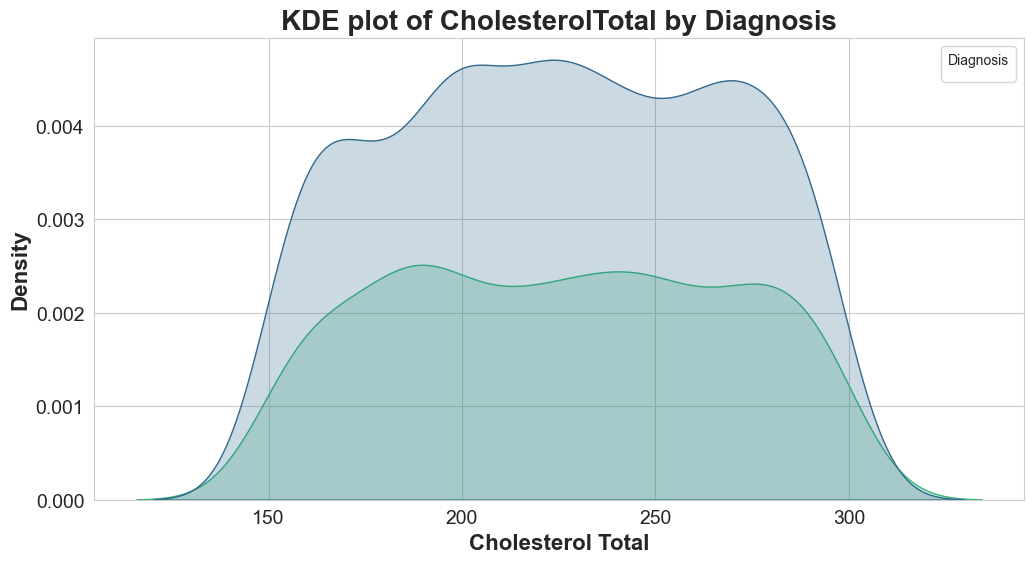

In [164]:
# 7. KDE plot of CholesterolTotal by Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.kdeplot(data=df_2, x='CholesterolTotal', hue='Diagnosis', fill=True, palette='viridis')
ax.set_title('KDE plot of CholesterolTotal by Diagnosis', fontsize=20, fontweight='bold')
ax.set_xlabel('Cholesterol Total', fontsize=16, fontweight='bold')
ax.set_ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Diagnosis', fontsize=12)
plt.show()

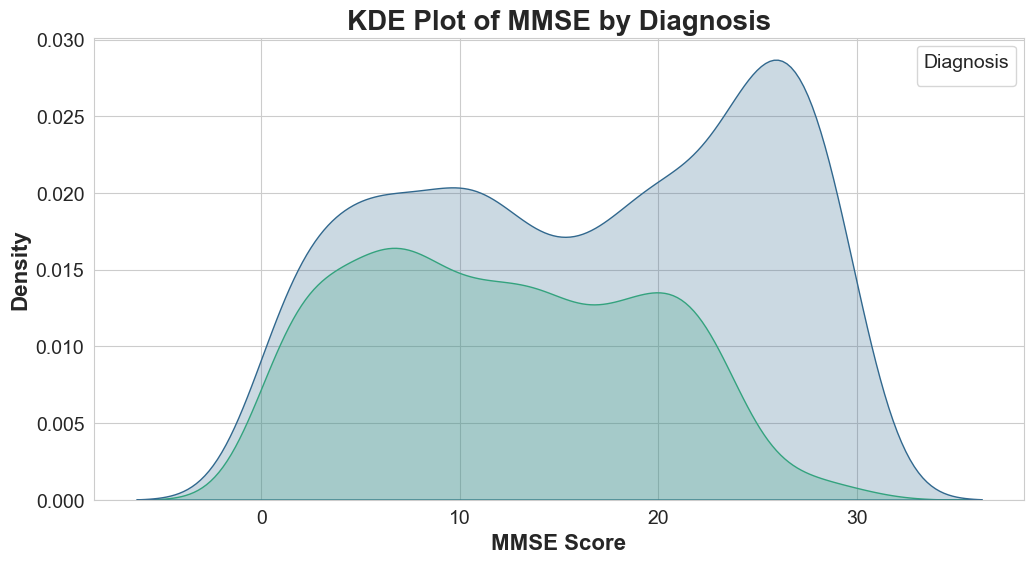

In [165]:
# 8. KDE plot of MMSE by Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.kdeplot(data=df_2, x='MMSE', hue='Diagnosis', fill=True, palette='viridis')
ax.set_title('KDE Plot of MMSE by Diagnosis', fontsize=20, fontweight='bold')
ax.set_xlabel('MMSE Score', fontsize=16, fontweight='bold')
ax.set_ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Diagnosis', fontsize=12, title_fontsize=14)
plt.show()

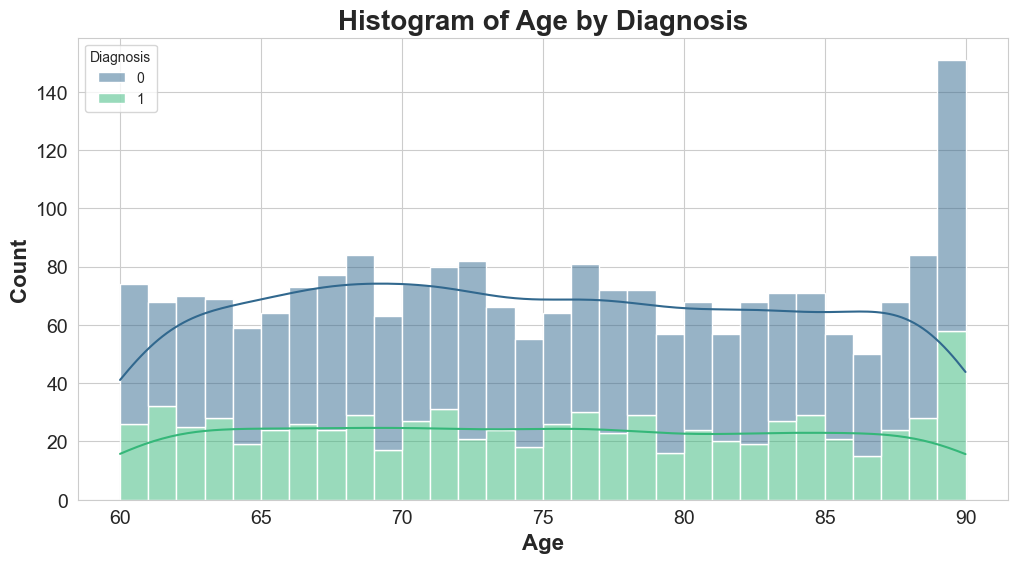

In [166]:
# Histogram of Age by Diagnosis
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
ax = sns.histplot(data=df_2, x='Age', hue='Diagnosis', multiple='stack', bins=30, kde=True, palette='viridis')

# Agregar título y etiquetas
ax.set_title('Histogram of Age by Diagnosis', fontsize=20, fontweight='bold')
ax.set_xlabel('Age', fontsize=16, fontweight='bold')
ax.set_ylabel('Count', fontsize=16, fontweight='bold')

# Ajustar tamaño de las etiquetas de los ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Mostrar el gráfico
plt.show()